<center><h1>Scoring Function</h1></center>

It will take out.csv as input and return final.csv as output

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('out.csv')

In [3]:
data

name        id      time      size        screen
0            wikipedia  0.000000  0.000000  0.000000  0.000000e+00
1       tutorialspoint  0.530120  0.340058  0.561510  1.209677e-01
2                 ndtv  0.200000  0.130622  0.405807  3.851394e-02
3              abplive  0.515658  0.446300  0.313385  5.622910e-02
4                  cnn  0.296729  0.112755  0.186196  5.579636e-02
5                  bbc  0.136364  0.226231  0.210942  3.982477e-02
6               news18  0.172881  0.126645  0.166538  6.278576e-04
7            dailymail  0.523041  0.312438  0.276950  0.000000e+00
8                chase  0.130435  0.000000  0.000000  0.000000e+00
9          tripadvisor  0.083333  0.025920  0.012839  9.640747e-03
10           telegraph  0.375335  0.141946  0.163777  1.437876e-02
11             wowhead  0.330472  0.185470  0.083710  0.000000e+00
12              roblox  0.088608  0.099507  0.057041  0.000000e+00
13              battle  0.420455  0.027834  0.084610  0.000000e+00
14            cricbuzz  0.617284  0.476133  0.516027  1.456884e-01
15                espn  0.128440  0.119284  0.052127  5.033346e-03
16               yahoo  0.368750  0.405104  0.142495  0.000000e+00
17           skysports  0.155844  0.059742  0.042771  0.000000e+00
18                ebay  0.567073  0.128110  0.130577  6.620000e-07
19                time  0.394040  0.161754  0.302196  3.029674e-03
20          techcrunch  0.326087  0.215355  0.274412  8.688985e-02
21              Indeed  0.380952  0.278370  0.390288  0.000000e+00
22             Alibaba  0.070707  0.034041  0.028750  0.000000e+00
23              Zillow  0.176471  0.142467  0.029908  0.000000e+00
24              Forbes  0.498392  0.317603  0.262474  1.367000e-01
25              porn00  0.129032  0.132405  0.106658  4.165590e-02
26             pornhub  0.132812  0.176315  0.083625  8.535900e-02
27              Reddit  0.213115  0.116486  0.273030  9.204609e-02
28            Linkedin  0.000000  0.000000  0.000000  0.000000e+00
29             Onclkds  0.200000  0.208333  0.166967  1.310484e-02
30                 Msn  0.321429  0.045717  0.186602  0.000000e+00
31       stackoverflow  0.514286  0.500000  0.273840  0.000000e+00
32              amazon  0.062201  0.057046  0.001805  0.000000e+00
33              google  0.000000  0.000000  0.000000  0.000000e+00
34            facebook  0.114286  0.061527  0.000175  1.043841e-05
35           instagram  0.000000  0.000000  0.000000  1.358696e-01
36        animalplanet  0.156863  0.083722  0.037785  1.691984e-02
37  nationalgeographic  0.268817  0.156046  0.041994  5.434783e-06
38           w3schools  0.358333  0.432311  0.352078  5.382514e-02
39                etsy  0.048780  0.017729  0.023346  0.000000e+00
40           homedepot  0.047619  0.003359  0.000920  0.000000e+00
41           cyberciti  0.047619  0.073086  0.026466  5.755066e-02
42             groupon  0.144144  0.042651  0.022750  0.000000e+00
43              target  0.020408  0.000000  0.000000  0.000000e+00
44             Netflix  0.000000  0.000000  0.000000  1.971609e-06
45               baidu  0.000000  0.000000  0.000000  0.000000e+00
46              reddit  0.225806  0.133259  0.289227  5.694015e-02
47             redtube  0.073333  0.086719  0.028355  2.414194e-01
48             twitter  0.051020  0.020735  0.003106  9.986096e-02
49          craigslist  0.000000  0.000000  0.000000  0.000000e+00
50            Nintendo  0.077562  0.008168  0.026691  0.000000e+00
51          Codecademy  0.139535  0.143770  0.070921  3.559000e-02

## Linear Weighted Function

Let's first use linear weighted function with equal weights to calculate score

In [4]:
score = (1-((data["id"]+data["time"]+data["size"]+data["screen"])/4))*10
data["lscore"] = score
lthreshold = 7

In [5]:
data[data["lscore"]<7]

name        id      time      size    screen    lscore
1   tutorialspoint  0.530120  0.340058  0.561510  0.120968  6.118360
3          abplive  0.515658  0.446300  0.313385  0.056229  6.671070
14        cricbuzz  0.617284  0.476133  0.516027  0.145688  5.612169
24          Forbes  0.498392  0.317603  0.262474  0.136700  6.962077
31   stackoverflow  0.514286  0.500000  0.273840  0.000000  6.779686

In [6]:
lst = []
for index, row in data.iterrows():
    if row["lscore"]>lthreshold:
        lst.append("Acceptable")
    else:
        lst.append("Non-Acceptable")
data["lcategory"] = lst

## Clustering

Here we are considering two extremes 0 and 1 as two extreme ends. We'll try to calculate proximity of each website with origin to categorize websites

In [7]:
dis = 10-((data["id"]**2+data["time"]**2+data["size"]**2+data["screen"]**2)**0.5)*10
data["cscore"] = dis

In [8]:
data

name        id      time      size        screen     lscore  \
0            wikipedia  0.000000  0.000000  0.000000  0.000000e+00  10.000000   
1       tutorialspoint  0.530120  0.340058  0.561510  1.209677e-01   6.118360   
2                 ndtv  0.200000  0.130622  0.405807  3.851394e-02   8.062643   
3              abplive  0.515658  0.446300  0.313385  5.622910e-02   6.671070   
4                  cnn  0.296729  0.112755  0.186196  5.579636e-02   8.371307   
5                  bbc  0.136364  0.226231  0.210942  3.982477e-02   8.466598   
6               news18  0.172881  0.126645  0.166538  6.278576e-04   8.833269   
7            dailymail  0.523041  0.312438  0.276950  0.000000e+00   7.218925   
8                chase  0.130435  0.000000  0.000000  0.000000e+00   9.673913   
9          tripadvisor  0.083333  0.025920  0.012839  9.640747e-03   9.670669   
10           telegraph  0.375335  0.141946  0.163777  1.437876e-02   8.261407   
11             wowhead  0.330472  0.185470  0.083710  0.000000e+00   8.500870   
12              roblox  0.088608  0.099507  0.057041  0.000000e+00   9.387111   
13              battle  0.420455  0.027834  0.084610  0.000000e+00   8.667754   
14            cricbuzz  0.617284  0.476133  0.516027  1.456884e-01   5.612169   
15                espn  0.128440  0.119284  0.052127  5.033346e-03   9.237787   
16               yahoo  0.368750  0.405104  0.142495  0.000000e+00   7.709128   
17           skysports  0.155844  0.059742  0.042771  0.000000e+00   9.354108   
18                ebay  0.567073  0.128110  0.130577  6.620000e-07   7.935597   
19                time  0.394040  0.161754  0.302196  3.029674e-03   7.847452   
20          techcrunch  0.326087  0.215355  0.274412  8.688985e-02   7.743140   
21              Indeed  0.380952  0.278370  0.390288  0.000000e+00   7.375974   
22             Alibaba  0.070707  0.034041  0.028750  0.000000e+00   9.666256   
23              Zillow  0.176471  0.142467  0.029908  0.000000e+00   9.127887   
24              Forbes  0.498392  0.317603  0.262474  1.367000e-01   6.962077   
25              porn00  0.129032  0.132405  0.106658  4.165590e-02   8.975623   
26             pornhub  0.132812  0.176315  0.083625  8.535900e-02   8.804720   
27              Reddit  0.213115  0.116486  0.273030  9.204609e-02   8.263306   
28            Linkedin  0.000000  0.000000  0.000000  0.000000e+00  10.000000   
29             Onclkds  0.200000  0.208333  0.166967  1.310484e-02   8.528987   
30                 Msn  0.321429  0.045717  0.186602  0.000000e+00   8.615629   
31       stackoverflow  0.514286  0.500000  0.273840  0.000000e+00   6.779686   
32              amazon  0.062201  0.057046  0.001805  0.000000e+00   9.697370   
33              google  0.000000  0.000000  0.000000  0.000000e+00  10.000000   
34            facebook  0.114286  0.061527  0.000175  1.043841e-05   9.560005   
35           instagram  0.000000  0.000000  0.000000  1.358696e-01   9.660326   
36        animalplanet  0.156863  0.083722  0.037785  1.691984e-02   9.261776   
37  nationalgeographic  0.268817  0.156046  0.041994  5.434783e-06   8.832843   
38           w3schools  0.358333  0.432311  0.352078  5.382514e-02   7.008630   
39                etsy  0.048780  0.017729  0.023346  0.000000e+00   9.775363   
40           homedepot  0.047619  0.003359  0.000920  0.000000e+00   9.870254   
41           cyberciti  0.047619  0.073086  0.026466  5.755066e-02   9.488195   
42             groupon  0.144144  0.042651  0.022750  0.000000e+00   9.476137   
43              target  0.020408  0.000000  0.000000  0.000000e+00   9.948980   
44             Netflix  0.000000  0.000000  0.000000  1.971609e-06   9.999995   
45               baidu  0.000000  0.000000  0.000000  0.000000e+00  10.000000   
46              reddit  0.225806  0.133259  0.289227  5.694015e-02   8.236919   
47             redtube  0.073333  0.086719  0.028355  2.414194e-01   8.925432   
48             twitter  0.051020  0.020735  0.003

In [9]:
cthreshold = 6
lst = []
for index, row in data.iterrows():
    if row["cscore"]>cthreshold:
        lst.append("Acceptable")
    else:
        lst.append("Non-Acceptable")
data["ccategory"] = lst

In [10]:
out = data[["name","lscore","lcategory","cscore","ccategory"]]
out.to_csv('final.csv', index=False)

In [11]:
out

name     lscore       lcategory     cscore       ccategory
0            wikipedia  10.000000      Acceptable  10.000000      Acceptable
1       tutorialspoint   6.118360  Non-Acceptable   1.475954  Non-Acceptable
2                 ndtv   8.062643      Acceptable   5.275332  Non-Acceptable
3              abplive   6.671070  Non-Acceptable   2.473655  Non-Acceptable
4                  cnn   8.371307      Acceptable   6.277847      Acceptable
5                  bbc   8.466598      Acceptable   6.596212      Acceptable
6               news18   8.833269      Acceptable   7.285920      Acceptable
7            dailymail   7.218925      Acceptable   3.307531  Non-Acceptable
8                chase   9.673913      Acceptable   8.695652      Acceptable
9          tripadvisor   9.670669      Acceptable   9.112642      Acceptable
10           telegraph   8.261407      Acceptable   5.663471  Non-Acceptable
11             wowhead   8.500870      Acceptable   6.119042      Acceptable
12              roblox   9.387111      Acceptable   8.550633      Acceptable
13              battle   8.667754      Acceptable   5.702145  Non-Acceptable
14            cricbuzz   5.612169  Non-Acceptable   0.538230  Non-Acceptable
15                espn   9.237787      Acceptable   8.170568      Acceptable
16               yahoo   7.709128      Acceptable   4.339697  Non-Acceptable
17           skysports   9.354108      Acceptable   8.277042      Acceptable
18                ebay   7.935597      Acceptable   4.041522  Non-Acceptable
19                time   7.847452      Acceptable   4.777326  Non-Acceptable
20          techcrunch   7.743140      Acceptable   5.146523  Non-Acceptable
21              Indeed   7.375974      Acceptable   3.876772  Non-Acceptable
22             Alibaba   9.666256      Acceptable   9.164248      Acceptable
23              Zillow   9.127887      Acceptable   7.712358      Acceptable
24              Forbes   6.962077  Non-Acceptable   3.390568  Non-Acceptable
25              porn00   8.975623      Acceptable   7.825341      Acceptable
26             pornhub   8.804720      Acceptable   7.489909      Acceptable
27              Reddit   8.263306      Acceptable   6.231646      Acceptable
28            Linkedin  10.000000      Acceptable  10.000000      Acceptable
29             Onclkds   8.528987      Acceptable   6.661549      Acceptable
30                 Msn   8.615629      Acceptable   6.255313      Acceptable
31       stackoverflow   6.779686  Non-Acceptable   2.322253  Non-Acceptable
32              amazon   9.697370      Acceptable   9.155818      Acceptable
33              google  10.000000      Acceptable  10.000000      Acceptable
34            facebook   9.560005      Acceptable   8.702046      Acceptable
35           instagram   9.660326      Acceptable   8.641304      Acceptable
36        animalplanet   9.261776      Acceptable   8.174368      Acceptable
37  nationalgeographic   8.832843      Acceptable   6.863495      Acceptable
38           w3schools   7.008630      Acceptable   3.350550  Non-Acceptable
39                etsy   9.775363      Acceptable   9.430890      Acceptable
40           homedepot   9.870254      Acceptable   9.522538      Acceptable
41           cyberciti   9.488195      Acceptable   8.921962      Acceptable
42             groupon   9.476137      Acceptable   8.479665      Acceptable
43              target   9.948980      Acceptable   9.795918      Acceptable
44             Netflix   9.999995      Acceptable   9.999980      Acceptable
45               baidu  10.000000      Acceptable  10.000000      Acceptable
46              reddit   8.236919      Acceptable   6.054864      Acceptable
47             redtube   8.925432      Acceptable   7.316991      Acceptable
48             twitter   9.563193      Acceptable   8.859172      Acceptable
49          craigslist  10.000000      Acceptable  10.000000      Acceptable
50            Nintendo   9.718947      Acceptable   9.175680      Acceptable
51          Co

/home/bhavya/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


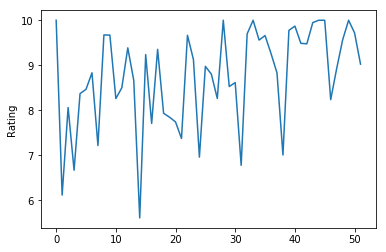

In [12]:
import matplotlib.pyplot as plt
plt.plot(out["lscore"])
plt.ylabel('Rating')
plt.show()